# c++实现

In [ ]:
#include <iostream>

struct POINT {
    double x, y, z;
};

double DistBewteenSegments(double alpha, double beta, 
                           POINT segmentA_start, POINT segmentA_end, POINT segmentB_start, POINT segmentB_end) {
    POINT segmentA_point = {
        (segmentA_end.x - segmentA_start.x) * alpha + segmentA_start.x,
        (segmentA_end.y - segmentA_start.y) * alpha + segmentA_start.y,
        (segmentA_end.z - segmentA_start.z) * alpha + segmentA_start.z
    };
    POINT segmentB_point = {
        (segmentB_end.x - segmentB_start.x) * beta + segmentB_start.x,
        (segmentB_end.y - segmentB_start.y) * beta + segmentB_start.y,
        (segmentB_end.z - segmentB_start.z) * beta + segmentB_start.z
    };
    return sqrt((segmentA_point.x - segmentB_point.x) * (segmentA_point.x - segmentB_point.x) +
        (segmentA_point.y - segmentB_point.y) * (segmentA_point.y - segmentB_point.y) +
        (segmentA_point.z - segmentB_point.z) * (segmentA_point.z - segmentB_point.z));
}

double DeltaAlpha(double alpha, double beta, POINT segmentA_start, POINT segmentA_end, POINT segmentB_start, POINT segmentB_end) {
    double I = (segmentA_end.x - segmentA_start.x) * alpha - 
        (segmentB_end.x - segmentB_start.x) * beta + segmentA_start.x - segmentB_start.x;
    double J = (segmentA_end.y - segmentA_start.y) * alpha - 
        (segmentB_end.y - segmentB_start.y) * beta + segmentA_start.y - segmentB_start.y;
    double K = (segmentA_end.z - segmentA_start.z) * alpha - 
        (segmentB_end.z - segmentB_start.z) * beta + segmentA_start.z - segmentB_start.z;
    return (2 * I * (segmentA_end.x - segmentA_start.x) +
        2 * J * (segmentA_end.y - segmentA_start.y) +
        2 * K * (segmentA_end.z - segmentA_start.z)) / 2;
}
    

double DeltaBeta(double alpha, double beta, POINT segmentA_start, POINT segmentA_end, POINT segmentB_start, POINT segmentB_end) {
    double I = (segmentA_end.x - segmentA_start.x) * alpha - 
        (segmentB_end.x - segmentB_start.x) * beta + segmentA_start.x - segmentB_start.x;
    double J = (segmentA_end.y - segmentA_start.y) * alpha - 
        (segmentB_end.y - segmentB_start.y) * beta + segmentA_start.y - segmentB_start.y;
    double K = (segmentA_end.z - segmentA_start.z) * alpha - 
        (segmentB_end.z - segmentB_start.z) * beta + segmentA_start.z - segmentB_start.z;
    return (2 * I * (segmentB_start.x - segmentB_end.x) +
        2 * J * (segmentB_start.y - segmentB_end.y) +
        2 * K * (segmentB_start.z - segmentB_end.z)) / 2;
}
    

int main()
{
    double alpha = 0.5;
    double beta = 0.5;
    double eta = 0.0001;
    int loop = 0;

    POINT segmentA_start = { 40, 65, 26 };
    POINT segmentA_end = { 4, 94, 33 };
    POINT segmentB_start = { 45, 65, 13 };
    POINT segmentB_end = { 47, 24, 51 };

    double f = DistBewteenSegments(alpha, beta, segmentA_start, segmentA_end, segmentB_start, segmentB_end);
    while (loop < 10000) {
        double alpha_new = std::min(std::max(
            alpha - eta * DeltaAlpha(alpha, beta, segmentA_start, segmentA_end, segmentB_start, segmentB_end) / f, 0.0), 1.0);
        double beta_new = std::min(std::max(
            beta - eta * DeltaBeta(alpha, beta, segmentA_start, segmentA_end, segmentB_start, segmentB_end) / f, 0.0), 1.0);
        double f_new = DistBewteenSegments(alpha_new, beta_new, segmentA_start, segmentA_end, segmentB_start, segmentB_end);
        if (std::abs(f - f_new) < 1e-6) {
            break;
        }
        f = f_new;
        alpha = alpha_new;
        beta = beta_new;
        loop += 1;
    }
    std::cout << "f = " << f << ", alpha = " << alpha << ", beta = " << beta << std::endl;
}

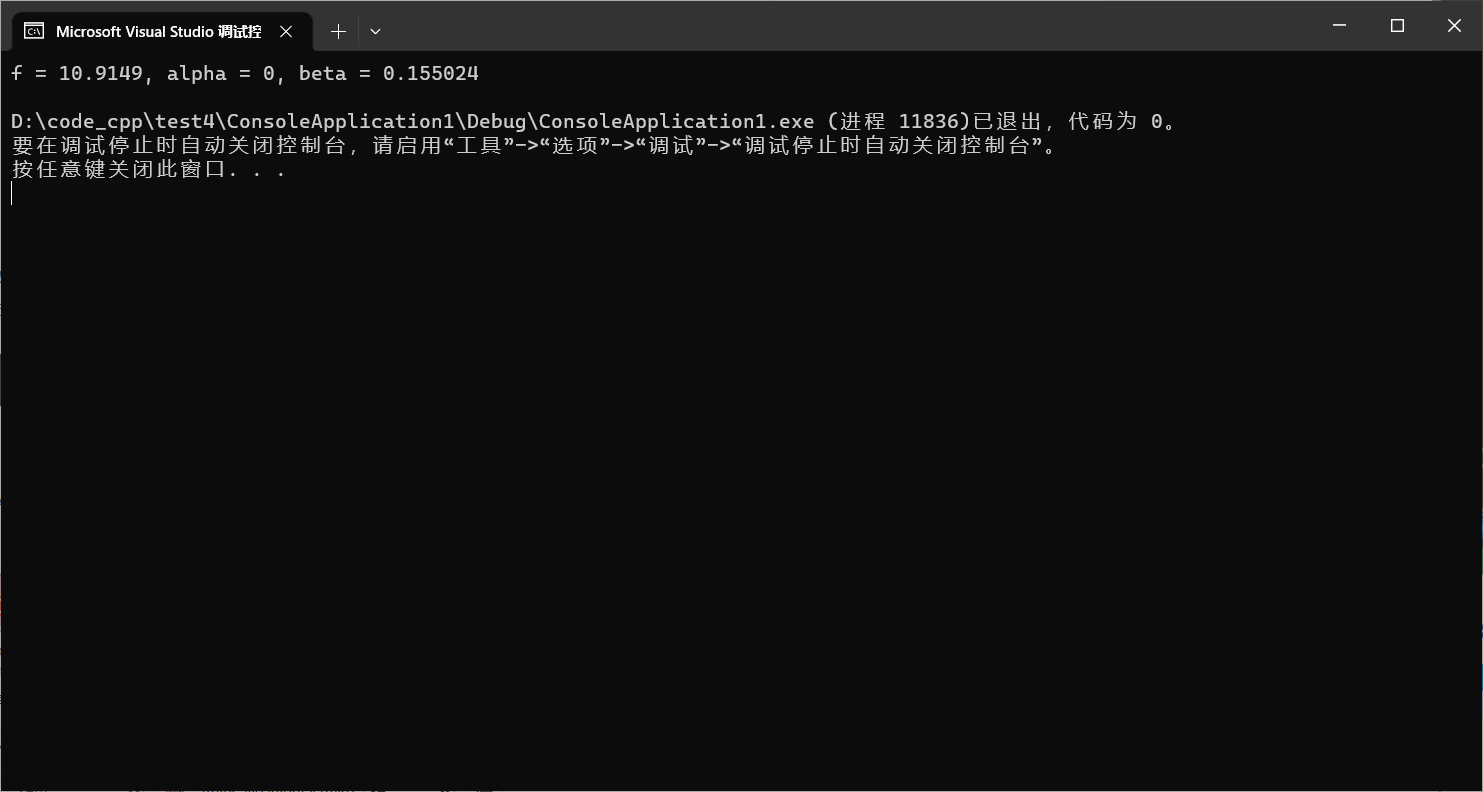

# python实现

In [1]:
import random
import numpy
import matplotlib.pyplot as plt

In [2]:
class Point:
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z

def dist_bewteen_segments(alpha, beta, segmentA_start, segmentA_end, segmentB_start, segmentB_end):
    segmentA_point = Point((segmentA_end.x - segmentA_start.x) * alpha + segmentA_start.x, 
                           (segmentA_end.y - segmentA_start.y) * alpha + segmentA_start.y,
                           (segmentA_end.z - segmentA_start.z) * alpha + segmentA_start.z)
    segmentB_point = Point((segmentB_end.x - segmentB_start.x) * beta + segmentB_start.x, 
                           (segmentB_end.y - segmentB_start.y) * beta + segmentB_start.y,
                           (segmentB_end.z - segmentB_start.z) * beta + segmentB_start.z)
    return ((segmentA_point.x - segmentB_point.x)**2 + 
             (segmentA_point.y - segmentB_point.y)**2 + 
             (segmentA_point.z - segmentB_point.z)**2)**0.5

def delta_alpha(alpha, beta, segmentA_start, segmentA_end, segmentB_start, segmentB_end):
    I = (segmentA_end.x - segmentA_start.x) * alpha - (segmentB_end.x - segmentB_start.x) * beta + segmentA_start.x - segmentB_start.x
    J = (segmentA_end.y - segmentA_start.y) * alpha - (segmentB_end.y - segmentB_start.y) * beta + segmentA_start.y - segmentB_start.y
    K = (segmentA_end.z - segmentA_start.z) * alpha - (segmentB_end.z - segmentB_start.z) * beta + segmentA_start.z - segmentB_start.z
    return ((2 * I * (segmentA_end.x - segmentA_start.x) + 
             2 * J * (segmentA_end.y - segmentA_start.y) + 
             2 * K * (segmentA_end.z - segmentA_start.z)) / 2)

def delta_beta(alpha, beta, segmentA_start, segmentA_end, segmentB_start, segmentB_end):
    I = (segmentA_end.x - segmentA_start.x) * alpha - (segmentB_end.x - segmentB_start.x) * beta + segmentA_start.x - segmentB_start.x
    J = (segmentA_end.y - segmentA_start.y) * alpha - (segmentB_end.y - segmentB_start.y) * beta + segmentA_start.y - segmentB_start.y
    K = (segmentA_end.z - segmentA_start.z) * alpha - (segmentB_end.z - segmentB_start.z) * beta + segmentA_start.z - segmentB_start.z
    return ((2 * I * (segmentB_start.x - segmentB_end.x) + 
             2 * J * (segmentB_start.y - segmentB_end.y) + 
             2 * K * (segmentB_start.z - segmentB_end.z)) / 2)

In [3]:
segmentA_start = Point(random.randint(0,100),random.randint(0,100),random.randint(0,100))
segmentA_end = Point(random.randint(0,100),random.randint(0,100),random.randint(0,100))
segmentB_start = Point(random.randint(0,100),random.randint(0,100),random.randint(0,100))
segmentB_end = Point(random.randint(0,100),random.randint(0,100),random.randint(0,100))
print(segmentA_start.x, segmentA_start.y, segmentA_start.z)
print(segmentA_end.x, segmentA_end.y, segmentA_end.z)
print(segmentB_start.x, segmentB_start.y, segmentB_start.z)
print(segmentB_end.x, segmentB_end.y, segmentB_end.z)

40 65 26
4 94 33
45 65 13
47 24 51


## 梯度下降法

In [4]:
alpha, beta = 0.5, 0.5
eta = 0.0001
loop = 0

f = dist_bewteen_segments(alpha, beta, segmentA_start, segmentA_end, segmentB_start, segmentB_end)
while loop < 5000:
    alpha_new = min(max(alpha - eta * delta_alpha(alpha, beta, segmentA_start, segmentA_end, segmentB_start, segmentB_end)/ f, 0), 1)
    beta_new = min(max(beta - eta * delta_beta(alpha, beta, segmentA_start, segmentA_end, segmentB_start, segmentB_end) / f, 0), 1)
    f_new = dist_bewteen_segments(alpha_new, beta_new, segmentA_start, segmentA_end, segmentB_start, segmentB_end)
    
    if abs(f - f_new) < 1e-6:
        break
    f, alpha, beta = f_new, alpha_new, beta_new
    loop += 1
print("f =", f, ", alpha =", alpha, ", beta =", beta)

f = 10.914864796284373 , alpha = 0 , beta = 0.15502351318503008


## 对比验证

In [5]:
record = float("inf")
x, y = -1, -1
for alpha in numpy.linspace(0, 1, 101):
    for beta in numpy.linspace(0, 1, 101):
        f = dist_bewteen_segments(alpha, beta, segmentA_start, segmentA_end, segmentB_start, segmentB_end)
        if f < record:
            record = f
            x, y = alpha, beta
print("f =", record, ", alpha =", alpha, ", beta =", beta)

f = 10.917989741706116 , alpha = 1.0 , beta = 1.0


## 快速验证是否是凸函数

In [6]:
set1 = set()
for _ in range(100000):
    alpha1 = random.random()
    alpha2 = random.random()
    beta1 = random.random()
    beta2 = random.random()

    v1 = (dist_bewteen_segments(alpha1, beta1, segmentA_start, segmentA_end, segmentB_start, segmentB_end) * 0.5 + 
          dist_bewteen_segments(alpha2, beta2, segmentA_start, segmentA_end, segmentB_start, segmentB_end) * 0.5)
    v2 = dist_bewteen_segments((alpha1 + alpha2) * 0.5, (beta1 + beta2) * 0.5, 
                               segmentA_start, segmentA_end, segmentB_start, segmentB_end)
    set1.add(v2 >= v1)
print("is convex") if len(set1) == 1 else print("is non-convex")

is convex


## 可视化

Text(0.5, 0, 'z')

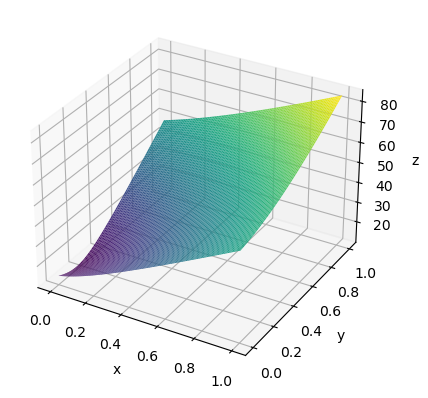

In [7]:
x = numpy.linspace(0, 1, 101)
y = numpy.linspace(0, 1, 101)
X, Y = numpy.meshgrid(x, y)
Z = dist_bewteen_segments(X, Y, segmentA_start, segmentA_end, segmentB_start, segmentB_end)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

In [ ]:
# https://blog.csdn.net/weixin_46308081/article/details/116209589
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#二元函数表达式
def f1(x,y):
    return 0.6 * (x + y) ** 2 -  x * y + 1
#对x求偏导
def hx1(x,y):
    return   0.6 * 2 * (x + y) - y
#对y求偏导
def hy1(x,y):
    return 0.6 * 2 * (x + y) - x

#初始值
x=4
y=4
#存放迭代的点坐标及对应函数值列表
GD_X=[]
GD_Y=[]
GD_Z=[]
#对应函数值的变化量及真实值
z_change=f1(x,y)
z_current=f1(x,y)
#学习率
alpha=1.2
#迭代次数
item_num=0

GD_X.append(x)
GD_Y.append(y)
GD_Z.append(z_current)

#迭代过程
while z_change>1e-10 and item_num<100:
    item_num+=1
    #改变x和y的值
    x1=x
    y1=y
    x=x-alpha*hx1(x1,y1)
    y=y-alpha*hy1(x1,y1)
    #存储当前情况下对应函数值
    temp=f1(x,y)
    
    z_change = np.abs(z_current-temp)
    z_current=temp
    
    GD_X.append(x)
    GD_Y.append(y)
    GD_Z.append(z_current)
    
print(u'最终结果：(%.5f,%.5f,%.5f)'%(x,y,z_current))
print("迭代次数：",item_num)
print(GD_X)
print(GD_Y)
print(GD_Z)

#作图
X=np.arange(-4,4,0.05)
Y=np.arange(-4,4,0.05)
X,Y=np.meshgrid(X,Y)

Z=np.array(list(map(lambda t:f1(t[0],t[1]),zip(X.flatten(),Y.flatten()))))
Z.shape=X.shape

fig = plt.figure(facecolor='w')
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,Z,rstride=1,cstride=1,cmap=plt.cm.jet)
ax.plot(GD_X,GD_Y,GD_Z,'ro--')

ax.set_title('min 0.6 * (x+y)^2 + 1')
plt.show()